# 2 - POD for MPT spectral signatures

In this example, we explore the use of POD for accelerating the computation of the MPT spectral signature (MPT coefficients as a function of exciting frequencies).

The computation of the MPT coefficients at a single frequency requires the setting up and solving of a finite element problem (which we also refer to as the full order problem) and, if we want to get a MPT spectral signature, we would need to repeatably solve the finite element problem for each frequency of interest. To get high fidelity MPT spectral signatures, this requires the use of large number of repeated full order solutions, which can become expensive if high order elements are used.

To reduce the computational cost of producing high fidelity spectral signatures, the routine use of the Proper Orthogonal Decomposition (POD) reduced order model is recommended. This only requires the calculation of a small number of full order solutions (typically) and is able to accurately predict the full MPT spectral signature at high-fidelity at much reduced cost.

See

[1] B. A. Wilson, P. D. Ledger, Efficient computation of the magnetic polarizabiltiy tensor spectral signature using proper orthogonal decomposition, Int. J. Numer. Meth. Eng. 1940-1963, 122(8), 2021

for a mathematical justification.


In [1]:
# This bit of code allows a python file to be changed and then for the updates to be available without restarting
# the jupyter kernal
%load_ext autoreload
%autoreload 2

from time import time
import numpy as np
from matplotlib import pyplot as plt
import os
# Please edit this line to provide the to the root directory of your copy of MPT-Calculator
Your_Path = r'C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator'
os.chdir(Your_Path)
os.getcwd()


'C:\\Users\\James\\Desktop\\Release_Ready_MPT_Calculator\\Restructured_MPT_Calculator'

## Workflow
The POD mode of $\texttt{MPT-Calculator}$ operates as follows:

 <img src="Figures/POD_flowchart.png" alt="isolated"/>

## Example

The POD mode of $\texttt{MPT-Calculator}$ is used by setting the $\texttt{use_POD}$ argument in the main function to True:
```python
main(use_POD=True)
```

We again consider the MPT characterisation of a conducting sphere with  $\sigma_*  = 10^6$ S/m, $\mu_r=10$, and radius $\alpha = 0.001$ m using the same default discretisation as in Tutorial 1.

When using POD, the default settings are to have  $\texttt{PODPoints=13}$ full order model solutions obtained at logarithmically spaced frequency snapshots and to extract modal information based on a singular value decomposition using a tolerance of $10^{-6}$. Reduced order model solutions are then computed at $\texttt{Points=40}$ logarithmically spaced output frequencies between $10^1$ and $10^8$ rad/s. These defaults can be controlled and will be explained later.


In [2]:
from main import main

sphere.geo
generating mesh
Mesh Contains Prisms? False
N Prisms: 0, N Tets: 7592


C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator\main.py:257: UserWarning: It looks like the main function was invoked from a jupyter notebook. 
Currently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. 
Unless you saved the file before running the code, this may not be the correct file.
  warn('It looks like the main function was invoked from a jupyter notebook. \nCurrently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. \nUnless you saved the file before running the code, this may not be the correct file.', stacklevel=1)


 mesh contains 7592 elements


Solving Theta0: 100%|█████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


 solved theta0 problems    
 solving theta1 snapshots


Solving Theta1 Snapshots: 100%|█████████████████████████████████████████████████████| 13/13 [01:03<00:00,  4.91s/it]


manually closed pool
 SVD complete                
 Number of retained modes = 8
manually closed poolder model
 reduced order systems solved
 frequency sweep complete


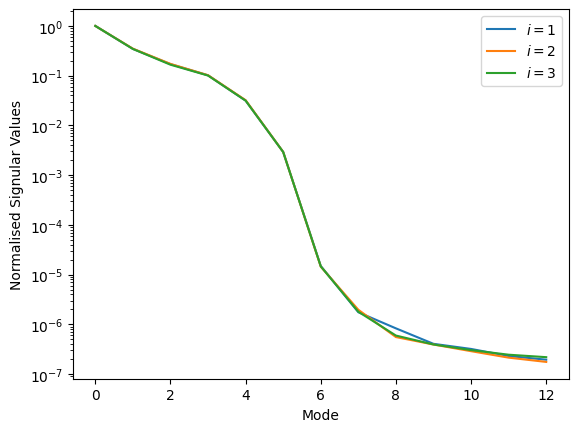

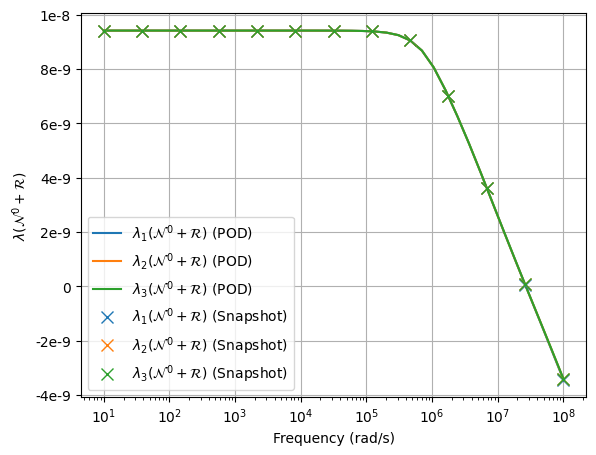

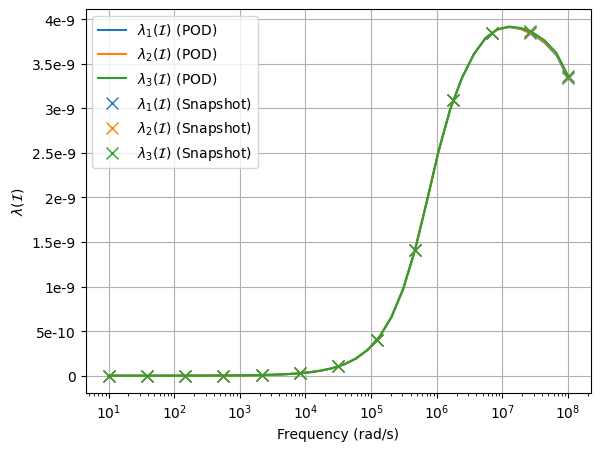

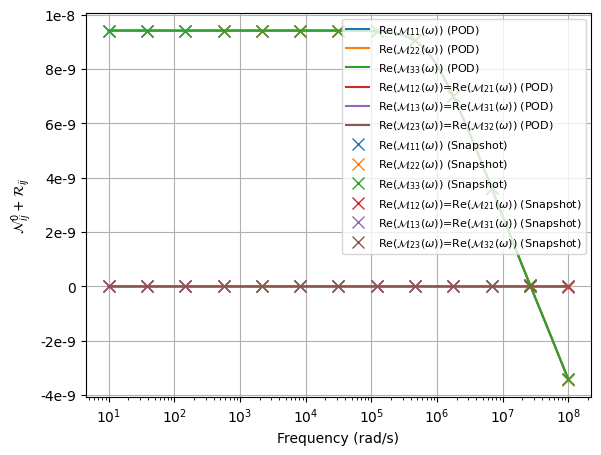

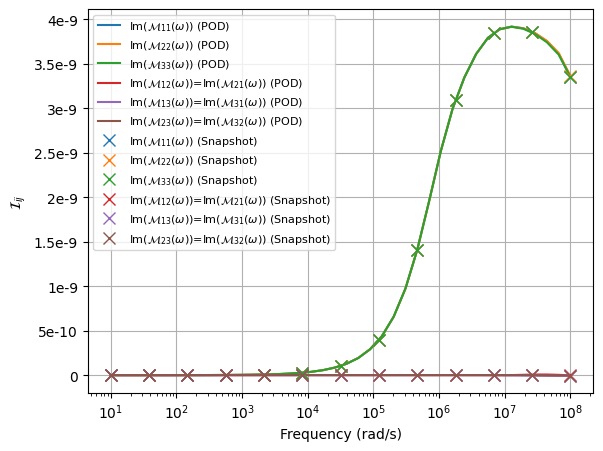

In [3]:
start_time = time();
Return_Dict = main(use_POD=True);
stop_time = time();

The graphs produced above show the POD solutions as continous lines with the snapshot (full order model solutions) indicated by crosses. The POD solutions pass through the full order model solutions as expected.

We can see that the computation time for the POD mode of MPT-Calculator is significantly faster than the equivalent full order sweep.

In [4]:
print(f'Total time = {(stop_time - start_time)/60} minutes')

Total time = 1.3259879231452942 minutes


## Estimating ROM Error:

The POD method also allows us to generate error certificates at minimal computational cost. These error certificates correspond to an approximation on the upper limit of the difference between the POD solution and the equivalent full order solution,

$|(\mathcal{R}[\alpha B, \omega])_{ij} - (\mathcal{R}^{\rm POD}[\alpha B, \omega])_{ij}| \le (\Delta[\omega])_{ij}$

$|(\mathcal{I}[\alpha B, \omega])_{ij} - (\mathcal{I}^{\rm POD}[\alpha B, \omega])_{ij}| \le (\Delta[\omega])_{ij}$

We can estimate upper limits on the accuracy of the POD with respect to the full order solution method directly within the software.
We do this within $\texttt{Settings/Settings.py}$ by changing
```python
#Produce certificate bounds for POD outputs
PODErrorBars = False
#(boolean)
```
to $\texttt{True}$.


sphere.geo
generating mesh
Mesh Contains Prisms? False
N Prisms: 0, N Tets: 7592


C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator\main.py:257: UserWarning: It looks like the main function was invoked from a jupyter notebook. 
Currently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. 
Unless you saved the file before running the code, this may not be the correct file.
  warn('It looks like the main function was invoked from a jupyter notebook. \nCurrently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. \nUnless you saved the file before running the code, this may not be the correct file.', stacklevel=1)


 mesh contains 7592 elements


Solving Theta0: 100%|█████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


 solved theta0 problems    
 solving theta1 snapshots


Solving Theta1 Snapshots: 100%|█████████████████████████████████████████████████████| 13/13 [01:03<00:00,  4.86s/it]


manually closed pool
 SVD complete                
 Number of retained modes = 8
manually closed poolder model
 reduced order systems solved
 frequency sweep complete


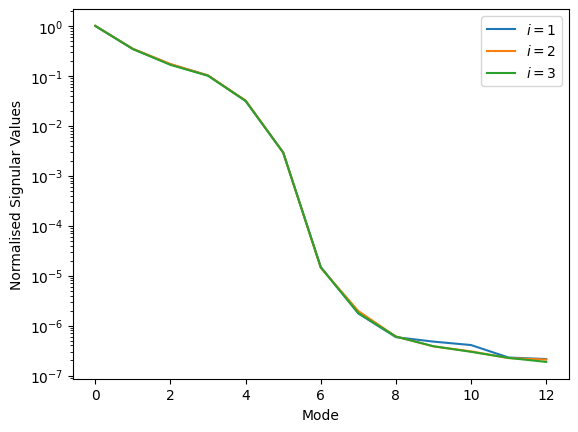

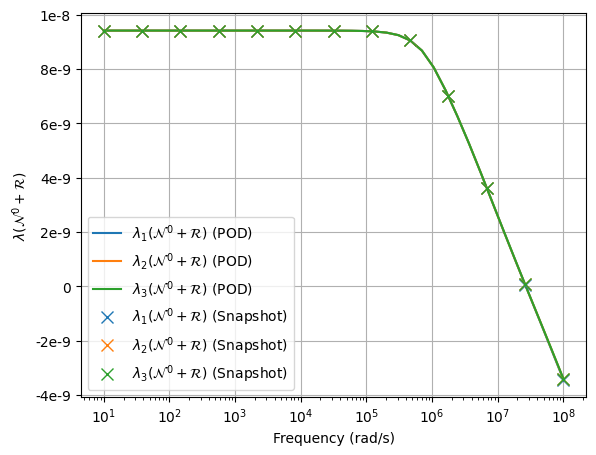

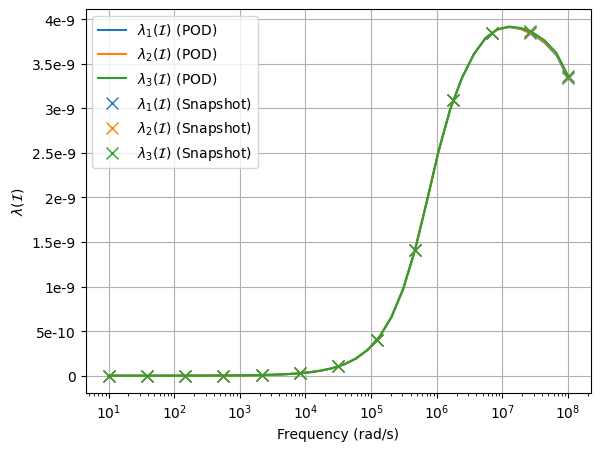

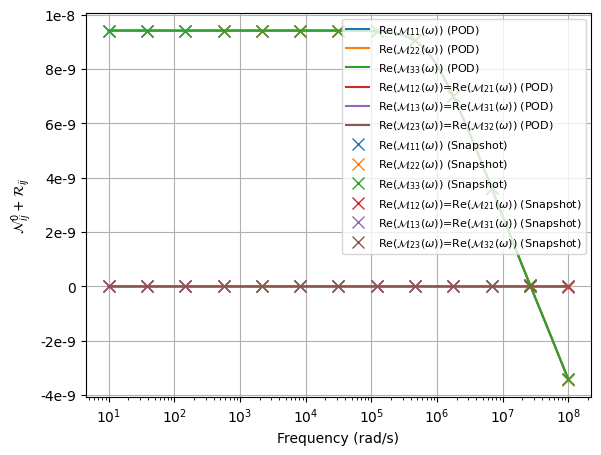

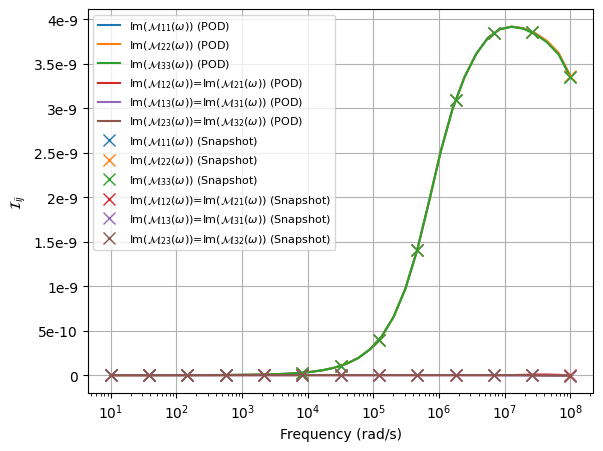

In [5]:
Return_Dict_POD = main(use_POD=True);

The above results show the same MPT spectral signature as before, but with the addition of error certificates.

The error certificates are shown to be extremely tight when evaluating the MPT at the snapshot frequencies. In addition, if we evaluate the relative error between the POD and full order solutions, 

$\frac{||\mathcal{M}^{(POD)} - \mathcal{M}^{(hp)}||_F}{||\mathcal{M}^{(hp)}||_F}$

we see that the true error is actually much smaller.


sphere.geo
generating mesh
Mesh Contains Prisms? False
N Prisms: 0, N Tets: 7592


C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator\main.py:257: UserWarning: It looks like the main function was invoked from a jupyter notebook. 
Currently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. 
Unless you saved the file before running the code, this may not be the correct file.
  warn('It looks like the main function was invoked from a jupyter notebook. \nCurrently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. \nUnless you saved the file before running the code, this may not be the correct file.', stacklevel=1)


 mesh contains  7592 elements


Solving Theta0: 100%|█████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


 solved theta0 problems    
 solving theta1


Solving Theta1: 100%|███████████████████████████████████████████████████████████████| 40/40 [03:11<00:00,  4.78s/it]


Frequency Sweep complete


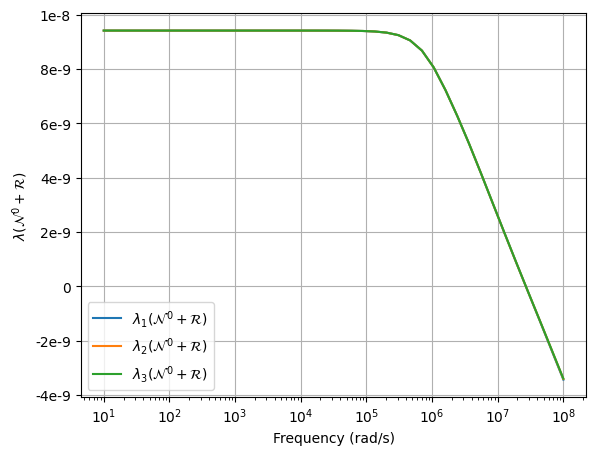

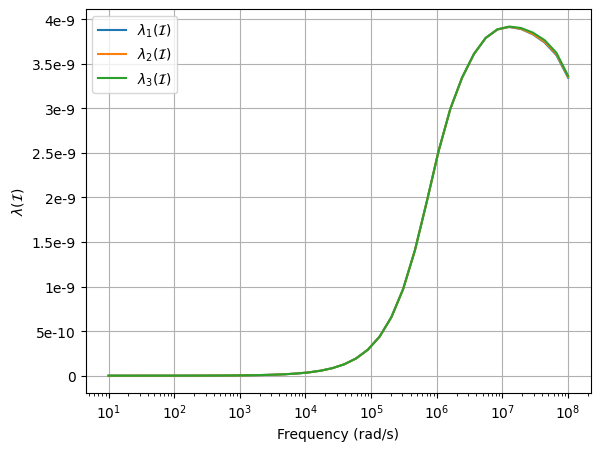

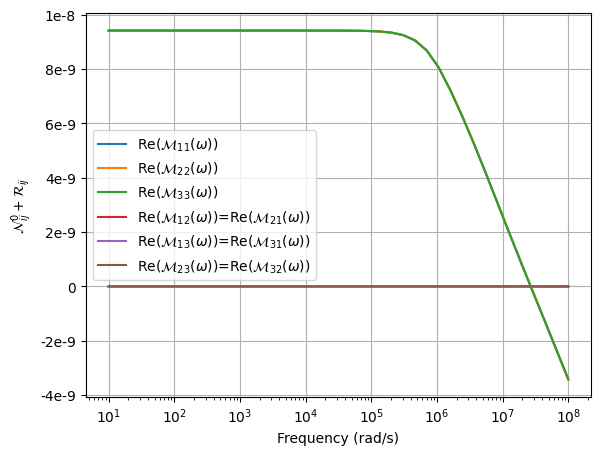

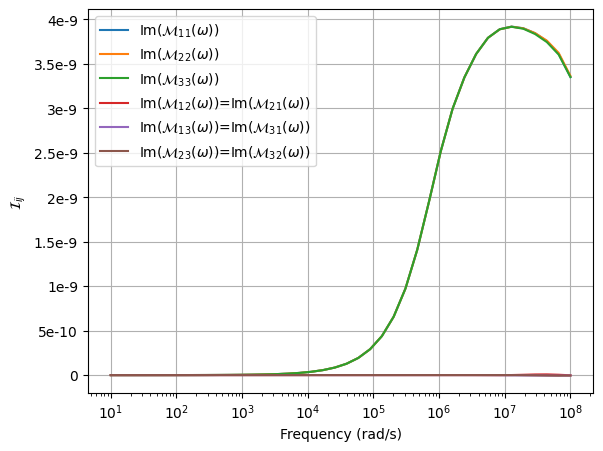

In [6]:
# Compute without POD to compare with POD solutions above
Return_Dict_full = main(use_POD=False)

relative_error = np.zeros(40)
for f in range(40):
    full_solutions = Return_Dict_full['TensorArray'][f,:]
    POD_solutions = Return_Dict_POD['TensorArray'][f,:]

    relative_error[f] = np.linalg.norm(POD_solutions - full_solutions) / np.linalg.norm(full_solutions)

Text(0, 0.5, 'Relative Error')

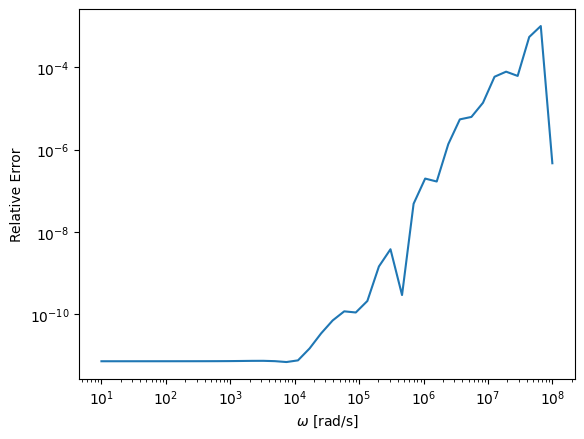

In [7]:
plt.figure()
plt.loglog(Return_Dict_full['FrequencyArray'], relative_error)
plt.xlabel('$\omega$ [rad/s]');
plt.ylabel('Relative Error')

The accuracy of the POD approximation with respect to the full order solution depends on the tolerance of the truncated singular value decomposition and the number of POD snapshots used. Both these parameters can be changed in the $\texttt{Settings.py}$ file.

For example, changing 
```python
#How many snapshots should be taken
PODPoints = 13
#(int)
```
to 20 will increase the number of snapshot solutions used in the construction of the POD and improve accuracy but take longer to compute.

Similarly, decreasing the tolerance on the truncated singular value decomposition will result in more retained information, but necessitates solving a larger problem.
```python
#Tolerance to be used in the TSVD
PODTol = 10**-6
#(float)
```

But, for many simple geometries, the default parameter can be used unchanged.


## Saving Results:
The output of the simulation, including any figures, are saved in the Results subfolder of the root directory.

For example:

$\texttt{Results/sphere/al_0.001_mu_10_sig_1e6/1e1-1e8_40_el_7592_ord_2_POD_13_1e-6}$

The results folder will contain a copy of the input files used for the simulation, including the mesh, .geo file, and a copy of the main function. This is so that the results can be recreated. 

The naming of the subfolders reflects
- The sphere problem that has been solved.
- The object size and materials ($\alpha=1\times 10^3$ m,  $\sigma_*=1\times 10^6$ S/m, $\mu_r=10$) by $\texttt{al_0.001_mu_10_sig_1e6}$.
- The frequency range, number of output frequencies, number of elements and element order ($10^1 \le \omega \le 10^8$ rad/s, 40 output frequencies, 7 592 elements, ) by $\texttt{1e1-1e8_40_el_7592_ord_2}$.
- The number of POD snapshots and the TSVD truncation tolerance by $\texttt{POD_13_1e-6}$.

In addition to the outputs specified in Tutorial [1](./1_full_order_solve_example.ipynb), which are stored in exactly the same format, the computed POD solutions are also stored in the Data/ folder that we introduced in Tutorial [1](./1_full_order_solve_example.ipynb). These are stored with the prefix "POD". Similarly, the POD solutions are added to the return dictionary with the "POD" prefix.

 - $\texttt{PODTensors}$ is the complex $n \times 9$ array containing each of the full order tensor coefficients for the $3 \times 3$ rank 2 MPT for each of the $n$ POD snapshot frequencies used in the construction of the ROM. Each row is a new snapshot frequency and on each row the entries are stored as ${\mathcal M}_{11}, \ldots, {\mathcal M}_{13}, {\mathcal M}_{21} \ldots, {\mathcal M}_{23}, {\mathcal M}_{31}, \ldots, {\mathcal M}_{33}$. 
 - $\texttt{PODEigenValues}$ is a $n\times 3$ array containing the eigenvalues for each of the $n$ snapshot frequencies. Note that each the entries are stored in the form of $\lambda_1 ({\mathcal R}+{\mathcal N}^0) + \rm{i} \lambda_1 ({\mathcal I}), \ldots,  \lambda_3 ({\mathcal R}+{\mathcal N}^0) + \rm{i} \lambda_3 ({\mathcal I})$ and each of the eigenvalues are sorted independently in ascending order. Also recall that ${\mathcal M}(\omega) = {\mathcal N}^0 +{\mathcal R}(\omega)  + \rm{i} {\mathcal I}(\omega)$
 - $\texttt{PODFrequencies}$ is the $n \times 1$ array containing the snapshot frequencies used for the construction of the ROM.


In [8]:
Return_Dict_POD.keys()

dict_keys(['HostScriptFileName', 'TensorArray', 'EigenValues', 'N0', 'NElements', 'FrequencyArray', 'NDOF', 'PODFrequencyArray', 'PODTensorArray', 'PODEigenValues', 'Invariants', 'SweepName'])

## Restarting POD:
New versions of MPT-Calculator allow the user to save out the truncated left singular matrix, $\mathbf{U}_i^M$ as $Ndof\times M$ complex matrices, by setting the variable $\texttt{Save_U}$ to $\texttt{True}$ in $\texttt{Settings.py}$
```python
# Save out the left singular vector in POD modes (Very large files!)
Save_U = False
# (boolean) option to save out the left singular vector used by the POD. This would allow the user to restart the POD operation, by setting OLDPOD=True, without needing to recalculate the full order snapshot solutions.
```
This saves $\mathbf{U}_i^M$ for $i=1,2,3$ in the object results folder as $\texttt{/Data/U1_truncated.npy}$, $\texttt{/Data/U2_truncated.npy}$, and $\texttt{/Data/U3_truncated.npy}$ as Numpy binary files. Note that these files can grow extremely large (>100MB) for high orders and densely meshed objects.

By saving out these files, the user is able to recompute the reduced order model output without recalculating the full order model solutions for each snapshot. For example, to compute the ROM at a higher fidelity of output frequencies and/or to compute the ROM at different output frequencies. To run MPT calculator using an existing POD solution, we set $\texttt{OldPOD=True}$ in $\texttt{Settings.py}$:
```python
#Use an old POD model saved to disk. This allows the user to specify a new set of frequencies without recomputing the POD snapshots.
OldPOD = True
#(boolean)
```
The OldPOD method searches $\texttt{Results/ObjectName/ObjectMaterial/SweepSettings/Data/}$ folder for the the U1, U2, and U3 files. If the sweep settings have changed, the onus is on the user to copy the U1, U2, and U3 files to the correct location. Note that if the discretisation, material parameters or snapshot frequencies are changed a complete new solution must be performed.
